## Example 2-02. Visualizing business review counts in the Yelp dataset

https://www.yelp.com/dataset/challenge

This example uses Yelp Dataset Round 11. (Not Round 6)

In [1]:
import pandas as pd
import json

In [2]:
# Load the data about businesses
biz_file = open('yelp/business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()]) 
biz_file.close()

In [3]:
# chcek size of data
biz_df.shape

(174567, 15)

In [4]:
biz_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA
2,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ
3,"5000 Arizona Mills Cr, Ste 435","{'BusinessAcceptsCreditCards': True, 'Restaura...",8DShNS-LuFqpEWIp0HxijA,"[Sporting Goods, Shopping]",Tempe,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",0,33.383147,-111.964725,Sports Authority,,85282,9,3.0,AZ
4,581 Howe Ave,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",PfOCPjBrlQAnz__NXj9h_w,"[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{'Monday': '11:00-1:00', 'Tuesday': '11:00-1:0...",1,41.119535,-81.475690,Brick House Tavern + Tap,,44221,116,3.5,OH


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

Text(0,0.5,'Occurrence')

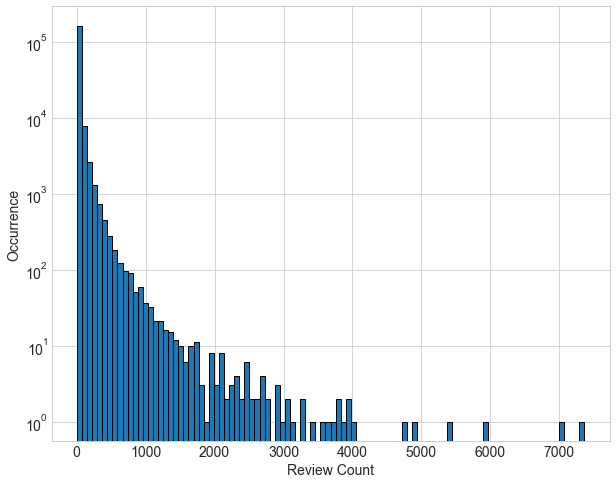

In [6]:
# Plot the histogram of the review counts 
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))
biz_df['review_count'].hist(ax=ax, bins=100, edgecolor='black')
ax.set_yscale('log', nonposy='clip')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

## Example 2-04. Computing deciles of Yelp business review counts

In [7]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]) 
deciles 

0.1     3.0
0.2     4.0
0.3     5.0
0.4     6.0
0.5     8.0
0.6    12.0
0.7    18.0
0.8    30.0
0.9    62.0
Name: review_count, dtype: float64

Text(0,0.5,'Occurrence')

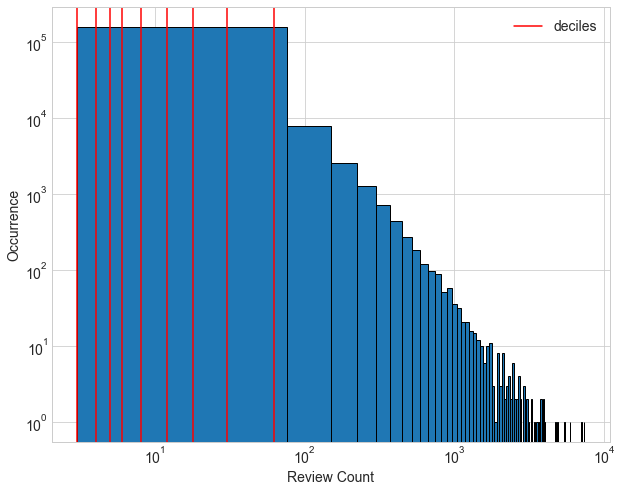

In [8]:
# Visualize the deciles on the histogram 
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(10, 8))
biz_df['review_count'].hist(ax=ax, bins=100, edgecolor='black') 
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14) 
ax.set_yscale('log') 
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14) 
ax.set_ylabel('Occurrence', fontsize=14)


## Example 2-6. Visualizing the distribution of review counts before and after log transform

In [13]:
import numpy as np

In [14]:
## Compute the log transform of the review count
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)

Text(0,0.5,'Occurrence')

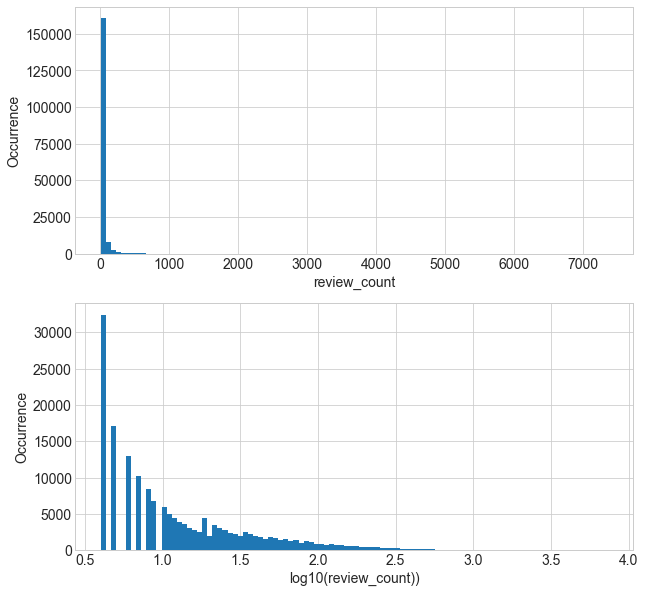

In [16]:
# Before
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10, 10))
biz_df['review_count'].hist(ax=ax1, bins=100) 
ax1.tick_params(labelsize=14)
ax1.set_xlabel('review_count', fontsize=14) 
ax1.set_ylabel('Occurrence', fontsize=14)

# After
biz_df['log_review_count'].hist(ax=ax2, bins=100) 
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10(review_count))', fontsize=14) 
ax2.set_ylabel('Occurrence', fontsize=14)